In [14]:
import csv
import matplotlib.pyplot as plt
from params import WIND_MAGS, VALID_TRAJS, VALID_WINDS
import pandas as pd

In [15]:
DATA_DIR = "data/"
NAMES = ["synth-fly", "pd-fly"]

data = {}
filenames = []
for name in NAMES:
    for traj in VALID_TRAJS:
        for wind_mag in WIND_MAGS:
            for wind in VALID_WINDS:
                filename = f"{DATA_DIR}{name}_{traj}_NF_{wind_mag}wind{wind}.csv"
                data[filename]=pd.read_csv(filename)
                filenames.append(filename)

In [16]:
data[filenames[0]].head()

,Unnamed: 0,t,p,p_d,v,v_d,q,R,w,T_sp,q_sp,hover_throttle,fa,pwm
0,1,0.005,"[1.0, 0.0, 0.0]","[1.0, 0.0, 1.0]","[0.015, 0.0, 0.050000025383283304]","[200.0, 0.0, 200.0]","[1.0, 0.0, 0.0, 0.0]","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[0.0, 0.0, 0.0]",NaN,NaN,NaN,"[3, 0, 0]","[70.37400989828677, 70.37400989828677, 70.3740..."
1,2,0.010,"[1.000075, 0.0, 0.0002500001269164165]","[0.9999451693655121, 0.02094241988335696, 1.0]","[0.03, 0.0, 0.09750013536447799]","[-0.010966126897571371, 4.188483976671392, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[-0.21689313259530962, -0.15591748208624354, -...",NaN,NaN,NaN,"[3, 0, 0]","[74.88052423354789, 76.88934361819122, 63.6232..."
2,3,0.015,"[1.0002250000000001, 0.0, 0.0007375008037388065]","[0.9997806834748455, 0.04187565372919963, 1.0]","[0.045, 0.0, 0.14261281762506373]","[-0.03289717813332871, 4.186646769168534, 0.0]","[0.9999997770222864, -0.0005422327105824371, -...","[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[-0.4445916378013651, -0.3216331812476799, 6.3...",NaN,NaN,NaN,"[3, 0, 0]","[74.40908955790596, 76.46323717355656, 62.2860..."
3,4,0.020,"[1.00045, 0.0, 0.0014505648918641252]","[0.9995065603657316, 0.06279051952931336, 1.0]","[0.05992836542067465, 9.96491740639269e-05, 0....","[-0.05482462182277992, 4.182973160022746, 0.0]","[0.9999979199503739, -0.0016537100011640065, -...","[[0.9999996961218702, 4.2271770043741934e-07, ...","[-0.6612370625448347, -0.48165409799428804, -1...",NaN,NaN,NaN,"[3, 0, 0]","[73.445783985909, 75.35140047058769, 61.596055..."
4,5,0.025,"[1.0007496418271034, 4.982458703196345e-07, 0....","[0.9991228300988584, 0.0836778433323155, 1.0]","[0.07471412337369232, 0.0003964089972962359, 0...","[-0.07674605337464335, 4.177464760600428, 0.0]","[0.9999916573183509, -0.003306792295007309, -0...","[[0.9999971493236856, 3.943141718129476e-06, -...","[-0.8644158411323937, -0.6342671861090019, -9....",NaN,NaN,NaN,"[3, 0, 0]","[72.44579292472575, 74.1831003358361, 61.01034..."


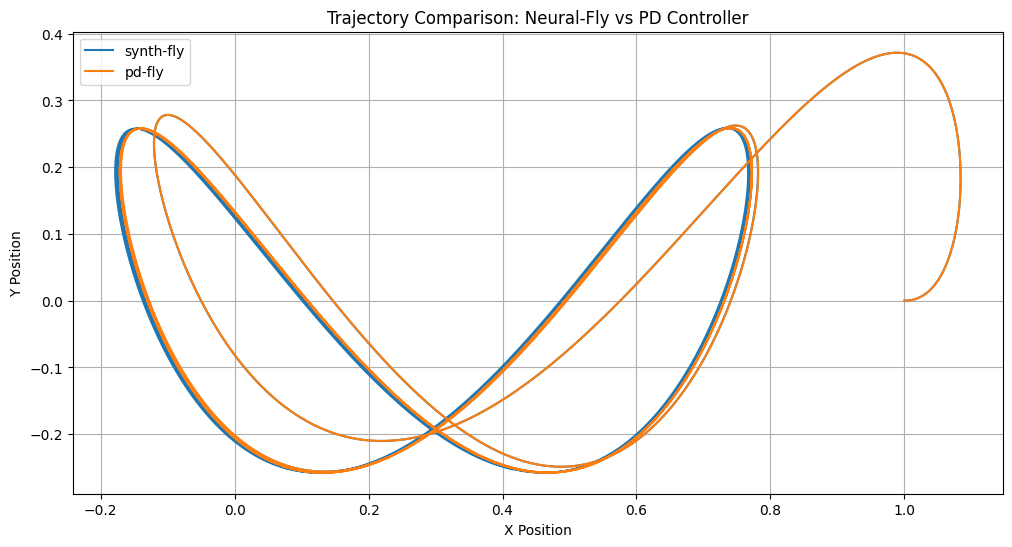

In [17]:
plt.figure(figsize=(12, 6))

# Plot complete trajectory from first file (synth-fly)
df1 = data[filenames[0]]
x1 = [eval(p)[0] for p in df1['p']]
y1 = [eval(p)[1] for p in df1['p']]
plt.plot(x1, y1, label='synth-fly')

# Plot complete trajectory from second file (pd-fly)
df2 = data[filenames[1]]
x2 = [eval(p)[0] for p in df2['p']]
y2 = [eval(p)[1] for p in df2['p']]
plt.plot(x2, y2, label='pd-fly')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectory Comparison: Neural-Fly vs PD Controller')
plt.legend()
plt.grid(True)